# 1. EDA


### Cargar librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

### Cargar datos y crear DF

In [3]:
df = pd.read_csv('election_results_2024.csv')
df.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


### Identifiquemos las columnas


In [4]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

**Columns:**

-**Constituency:** Nombre de la circunscripción parlamentaria.

-**Const. No.:** El número único asignado a cada circunscripción.

-**Leading Candidate:** Nombre del candidato más votado en la circunscripción.

-**Leading Party:** El partido político del candidato principal.

-**Trailing Candidate:** Nombre del candidato que ha recibido el segundo mayor número de votos.

-**Trailing Party:** Partido político del candidato rezagado.

-**Margin:** Número de votos por los que ha ganado el candidato principal.

-**Status:** El estado del resultado (por ejemplo, «Resultado declarado»).


### Verificación de valores inapropiados.

In [5]:
df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


#### Interpretación:

Vemos que la variable a analizar presenta valores lógicos, sin embargo, también se ve que hace falta otra variable numerica comolo es el margen, locual nos indica que debemos cambiar el tipo de dato.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


**Análisis:**

Vemos entonces que todos los datos tiene formatos consistentes excepto el Margin que se presenta como texto,por lo tanto lo cambiaremos a int.


### Análisis de valores nulos y tipos de datos.

In [7]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce') #Convertimos los valores de margin a número y los valores que no se puedan convertir sereemplazaran por  NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        543 non-null    object 
 1   Const. No.          543 non-null    int64  
 2   Leading Candidate   543 non-null    object 
 3   Leading Party       543 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              542 non-null    float64
 7   Status              543 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 34.1+ KB


Vemos entonces que hay 1 registro con valores nulos en 3 columnas, vamos a aplicar un filtro a ver de que se trata

In [8]:
df[df['Margin'].isna()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,NaN,Uncontested


Vemos que no hay información del candidato opositor lo cual es validado en la columna status dode se indica que nohay oposición.

Teniendo en cuenta que el dato de mayor relevancia es el margen y que no poseemos información sobre el número de votos del candidato ganador es aceptable eliminar este registro.

In [9]:
df =df.dropna(subset=['Margin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        542 non-null    object 
 1   Const. No.          542 non-null    int64  
 2   Leading Candidate   542 non-null    object 
 3   Leading Party       542 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              542 non-null    float64
 7   Status              542 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 38.1+ KB


In [10]:
df.describe()
df = df.astype({'Margin': 'int64'})
df.describe()


,Const. No.,Margin
count,542.000000,5.420000e+02
mean,18.167897,1.623501e+05
std,16.441108,1.472628e+05
min,1.000000,4.800000e+01
25%,6.000000,5.895675e+04
50%,14.000000,1.222660e+05
75%,25.000000,2.229720e+05
max,80.000000,1.175092e+06


**Análisis:**

- Se eliminaron los valores nulos (solo 1 registro)

- Se cambió el tipo de dato de Margin a int

- Se verifició que las variables numericas no tuvieran valores inapropiados

### Registros duplicados


In [11]:
df[df.duplicated()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status


No hay registros duplicados podemos seguircon el análisis.

### Valores únicos

En este apartado lo que hice fue crear un diccionario donde las claves son las colummnas y los valores son los valores únicos de cada columna.Para esto hice uso de un diccionario por comprensión. Es claro que no tiene mucho sentido hablar de valores unicos en series como Margin pero solo quise aprovechar la facilidad de los diccionarios por comprensión para analizar el resto de series.

Como se puede observar los valores únicosson muchosdebido a la naturaleza de los datos es lógico que haya muchos candidatos y partidos diferentes, la única variable categorica que podría tomar valores diferentes sería status pero vemos que los valores son los esperodos, por lo cuál podemos continuar con el ejercicio.

In [12]:
unique_values = {col: df[col].unique() for col in df.columns}

pprint(unique_values)

{'Const. No.': array([13,  8,  1,  3,  7, 12, 18, 37, 44,  6, 15,  9,  2, 52, 55, 14,  5,
       16, 19, 24, 29, 32, 40, 69, 20, 17, 10, 23, 11, 56, 72, 48, 26, 25,
       27, 36, 67, 53, 35, 38, 39, 61, 78, 22,  4, 42, 41, 33, 21, 76, 66,
       60, 54, 49, 75, 70, 59, 64, 47, 31, 28, 45, 73, 46, 57, 43, 50, 65,
       68, 74, 63, 34, 79, 30, 51, 80, 71, 62, 58, 77], dtype=int64),
 'Constituency': array(['AJMER', 'ALWAR', 'AMBALA', 'ANANTNAG-RAJOURI', 'ARAKKONAM',
       'ARANI', 'Adilabad', 'Agra', 'Ahmedabad East', 'Ahmedabad West',
       'Ahmednagar', 'Akbarpur', 'Akola', 'Alappuzha', 'Alathur',
       'Aligarh', 'Alipurduars', 'Allahabad', 'Almora', 'Amalapuram (SC)',
       'Ambedkar Nagar', 'Amethi', 'Amravati', 'Amreli', 'Amritsar',
       'Amroha', 'Anakapalle', 'Anand', 'Anandpur Sahib', 'Ananthapur',
       'Andaman & Nicobar Islands', 'Aonla', 'Araku (ST)', 'Arambagh',
       'Araria', 'Arrah', 'Arunachal East', 'Arunachal West', 'Asansol',
       'Aska', 'Attingal', 'Aura

# 2. Exploración de datos con python


### Visualizaciones univariadas

In [13]:
df.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


### Histograma - BoxPlot Distribución del margen de votos entre candidatos

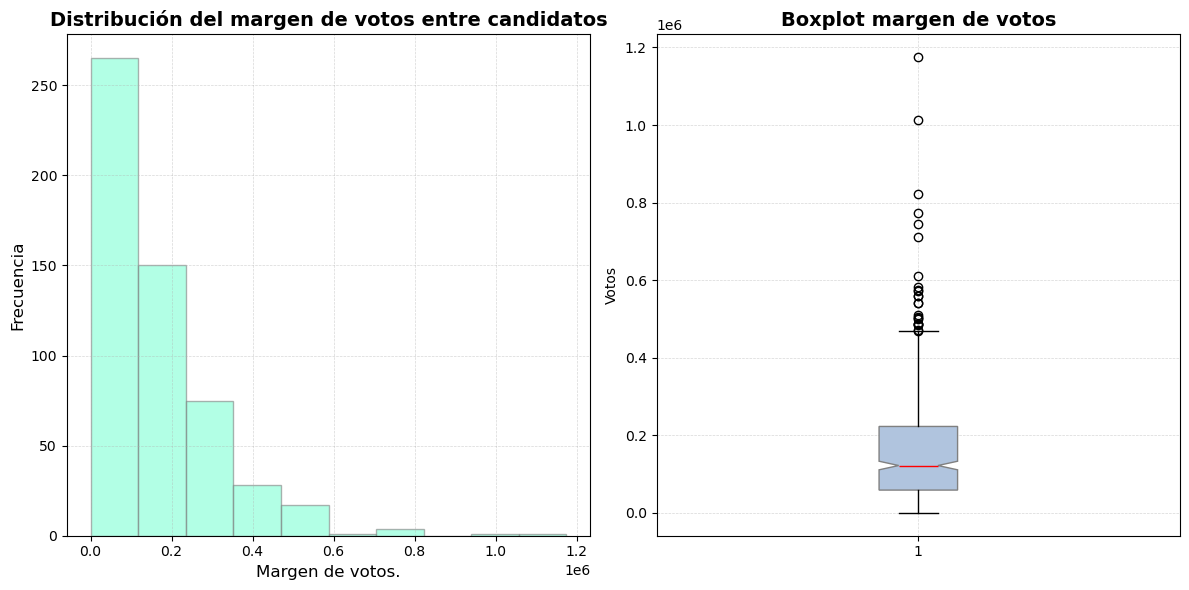

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

#  Histograma distribución del margen
ax[0].hist(df['Margin'],
            bins=10,
            alpha=0.6,
            color='aquamarine',
            edgecolor='grey',
            linewidth=1)

ax[0].set_title(f'Distribución del margen de votos entre candidatos',
                 fontsize = 14,
                 fontweight = 'bold')

ax[0].set_xlabel('Margen de votos.', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)

ax[0].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)


# BoxPlot distribución del amrgen
ax[1].boxplot(df['Margin'], notch=True,
              patch_artist=True,
              boxprops=dict(facecolor='lightsteelblue', color='gray'), 
              medianprops=dict(color='red'),
              whiskerprops=dict(color='black'), 
              capprops=dict(color='black'))
ax[1].set_title("Boxplot margen de votos",
                fontsize = 14,
                fontweight = 'bold')
ax[1].set_ylabel("Votos")
ax[1].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)

plt.tight_layout();

### **Análisis:**

- El histograma nos muestra que la mayoria de disputas se dieron en un margen entre 0 y 300 mil y unas pocas se dieron por diferencias mayores.

- El boxplot nos muestra un rango intercuartilico un poco reducido,además de mayor variabilidad del margen por encima del terce cuartil incluso con varios valores atipicos.

### Visualizaciones multivariadas

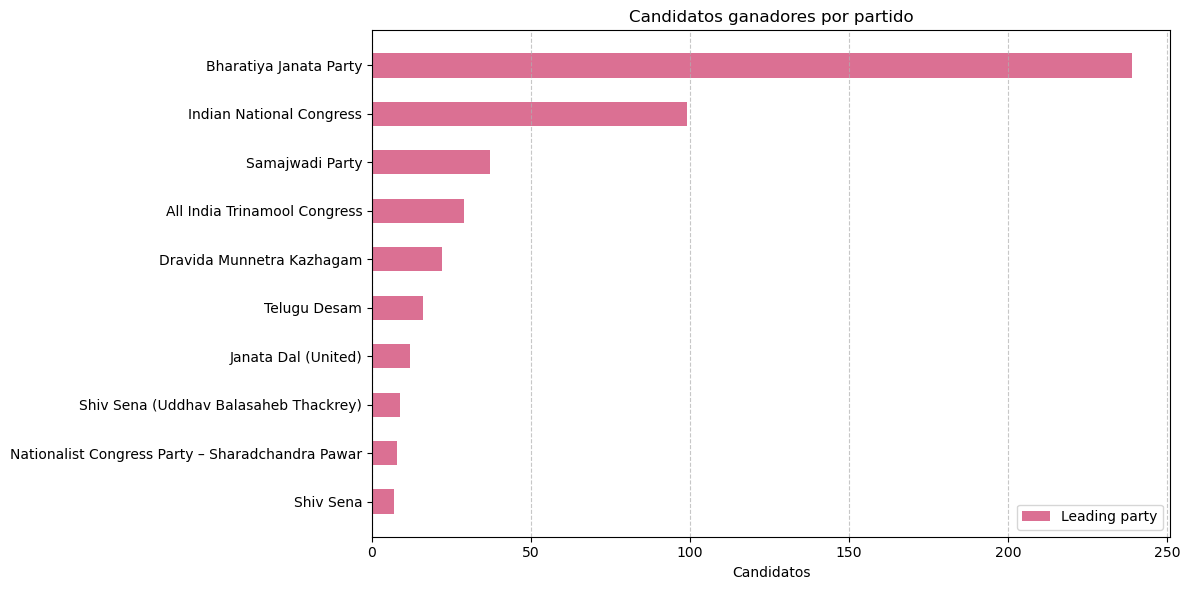

In [46]:
# Agrupo por partido ganador
grouped_by_leading_party = df.groupby('Leading Party')

# Ganadores por leading party
ganadores_por_leading_party = grouped_by_leading_party['Leading Party'].count().sort_values(ascending=False)


# Agrupo por candidato perdedor
grouped_by_trailing_candidate = df.groupby('Trailing Party')

# Perdedores por trailing party
perdedores_por_leading_party = grouped_by_trailing_candidate['Trailing Party'].count().sort_values(ascending=False)
perdedores_por_leading_party.iloc[0:10]

# Creamos el gráfico
fig1, ax1 = plt.subplots( figsize=(12,6))
height = 0.5

# Serie leading party
ax1.barh(ganadores_por_leading_party.iloc[0:10].index, 
         ganadores_por_leading_party.iloc[0:10],
         color='palevioletred',
         label='Leading party',
         height=height)


# Ejes y titulos
ax1.set_xlabel('Candidatos')
ax1.set_title('Candidatos ganadores por partido')
ax1.legend()
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
ax1.invert_yaxis()  # Para que los valores mayores aparezcan arriba

plt.tight_layout();

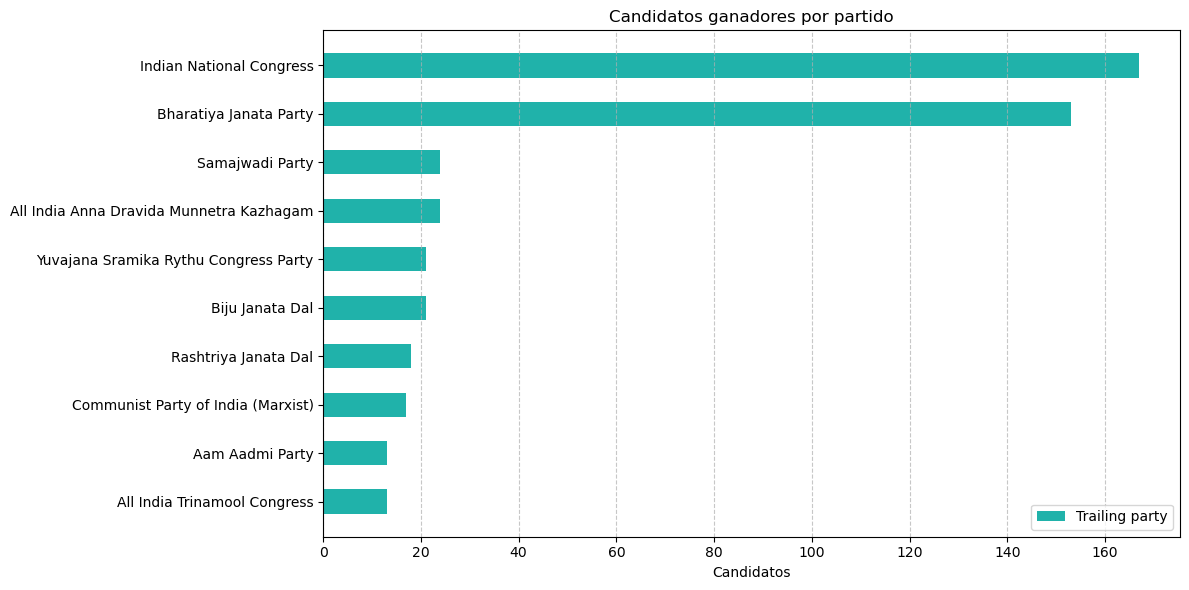

In [48]:
# Creamos el gráfico
fig1, ax1 = plt.subplots( figsize=(12,6))
height = 0.5

# Serie trailing party
ax1.barh(perdedores_por_leading_party.iloc[0:10].index, 
         perdedores_por_leading_party.iloc[0:10],
         color='lightseagreen',
         label='Trailing party',
         height=height)

# Ejes y titulos
ax1.set_xlabel('Candidatos')
ax1.set_title('Candidatos ganadores por partido')
ax1.legend()
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
ax1.invert_yaxis()  # Para que los valores mayores aparezcan arriba


plt.tight_layout();

**Análisis:**

De los graficos anteriores podemos concluir que los partidos Indian National Congress y Bharatiya Janata Party aportaron la mayoria de los candidatos, tanto ganadores como perdedore.

## Análisis adicional:

### Estadísticas descriptivas

In [50]:
df.describe()

,Const. No.,Margin
count,542.000000,5.420000e+02
mean,18.167897,1.623501e+05
std,16.441108,1.472628e+05
min,1.000000,4.800000e+01
25%,6.000000,5.895675e+04
50%,14.000000,1.222660e+05
75%,25.000000,2.229720e+05
max,80.000000,1.175092e+06


De lo anterior vemos una desviación estandar alta para el margin lo cual indica lo que habíamos vsito del boxplot: poco agrupamiento alrededor de la media y alta variabilidad